In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
from datetime import date

from tqdm import tqdm_notebook
from tqdm import tqdm
tqdm_notebook().pandas()

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

A Jupyter Widget

# Raiffeisen Data Cup
#### https://boosters.pro/champ_11

Задача
Клиенты Райффайзенбанка совершают покупки и снимают наличные в банкоматах с помощью карточек. Получив в виде обезличенных данных их историю транзакций, информацию о мерчантах (место, позволяющее принимать платежи с использованием банковской пластиковой карты), участники чемпионата должны предсказать две пары координат: дом и работу клиента. Оценкой качества решения в задаче является процент попаданий в окружность радиуса 0.02 градуса относительно реальных координат дома и работы.  

В задаче предстоит предсказать две пары координат (_HOME_LAT_,_HOME_LON_,_WORK_LAT_,_WORK_LON_): работы и дома. Т.е если в тесте N клиентов, то нам необходимо попасть в 2N кругов радиуса 2N. Результат можно воспринимать как среднее accuracy по дому и работе.

В качестве датасета участникам предоставлены истории транзакций клиентов «Райффайзенбанк».   

# Данные 

In [273]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

In [271]:
print('train shape = ', train.shape)
train.head(5)

train shape =  (1224734, 21)


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,home_add_lat,home_add_lon,...,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,work_add_lat,work_add_lon,dow,hol,date_int
0,2.884034,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,...,nan,59.844072,30.179153,11606fde0c814ce78e0d726e39a0a5ee,2017-07-15,59.847,30.177,5.0,1,195.0
1,2.775633,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,...,nan,59.844072,30.179153,e9647a5e1eacfb06713b6af755ccc595,2017-10-27,59.847,30.177,4.0,0,299.0
2,3.708368,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,...,"pr.marshala zhukova,31st petersburg190000 7...",59.858198,30.229024,df06c1fcd3718a514535ae822785f716,2017-10-03,59.847,30.177,1.0,0,275.0
3,2.787498,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,...,nan,59.844072,30.179153,6c5e5793ebc984fb72875feffff62854,2017-09-09,59.847,30.177,5.0,1,251.0
4,2.892510,nan,NaN,NaN,st petersburg,RUS,643.0,0dc0137d280a2a82d2dc89282450ff1b,59.851,30.232,...,nan,59.844072,30.179153,0576445d74e374c92c0902e612fca356,2017-07-06,59.847,30.177,3.0,0,186.0


In [272]:
print('test shape = ', test.shape)
test.head(5)

test shape =  (1265470, 17)


,amount,atm_address,atm_address_lat,atm_address_lon,city,country,currency,customer_id,mcc,pos_address,pos_address_lat,pos_address_lon,terminal_id,transaction_date,dow,hol,date_int
0,2.211818,nan,NaN,NaN,ivanteevka,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,5411,2-1 tolmacheva strivanteevka141280 rusrus,55.967487,37.913682,ff0476dae4b098a7b16aabe93d4268df,2017-08-24,3.0,0,235.0
1,1.331379,nan,NaN,NaN,ivanteevka,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,4111,"sovetskij, 32ivanteevka141282 rusrus",55.971296,37.905184,7cfd9a60282459d4692ecc85b856072e,2017-08-12,5.0,1,223.0
2,2.608004,nan,NaN,NaN,pushkino,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,5411,"105,krasoarmeyskoe shpushkino141206 rusrus",56.016591,37.909098,7e5a532f0029861d8a9c4f0479b9450b,2017-06-17,5.0,1,167.0
3,1.916752,nan,NaN,NaN,ivanteevka,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,5411,"g. ivanteevka, ul.tolmacheva, d.6ivanteevka141...",55.964507,37.937912,2afe7d1bc61b86c449f413bdf2119032,2017-08-12,5.0,1,223.0
4,1.981067,nan,NaN,NaN,moscow,RUS,643.0,00fd410f5c580c8351cafa88d82b60f3,5814,5 komsomolskaya sqmoscow101000 rusrus,55.776802,37.657352,ab4f00601ff1d949afc59ee3f804c79c,2017-04-26,2.0,0,115.0


In [274]:
#Небольшой косяк в названии колонок
train.rename(columns={'pos_adress_lat':'pos_address_lat', 'pos_adress_lon':'pos_address_lon'}, inplace=True)

#Объединим train и test для удобства
data = pd.concat([train, test], axis=0)

## Описание колонок

**terminal_id**  -  идентификационный номер терминала  
**customer_id**  -  идентификационный номер клиента  
**amount**  -  количество потраченных средств за транзакцию
**city**  -  город
**country**  -  страна  
**currency**  -  валюта  
**mcc**  -  код категории продавца  
**transaction_date**  -  дата транзакции  
**atm_address**  -  адрес банкомата  
**atm_address_lat**  -  адрес установки банкомата широта  
**atm_address_lon**  -  адрес установки банкомата долгота  
**pos_address**  -  адрес установки pos-терминала  
**pos_address_lat**  -  адрес установки pos-терминала широта  
**pos_address_lon**  -  адрес установки pos-терминала долгота  
**work_add_lat**  -  широта работы клиента  
**work_add_lon**  -  долгота работы клиента  
**home_add_lat**  -  широта дома клиента  
**home_add_lon**  -  долгота дома клиента  

## Особенности данных

**1)** Всего имеем примерно 300000 различных терминалов (пересекаются в трейне и тесте)  
**2)** Имеем по 10000 и 9997 непересекающихся кастомеров в трейне и тесте соответственно  
**3)** Распределение сумм транзакций приведено на гистограмме (С учетом валюты)

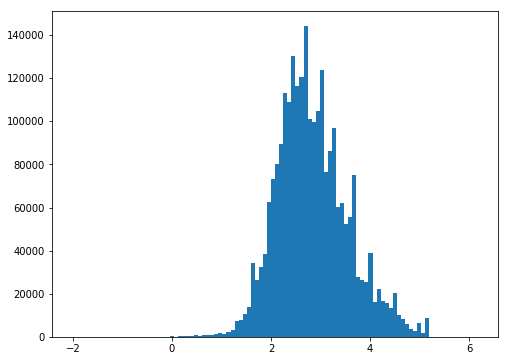

In [275]:
plt.figure(figsize = (8, 6))
_ = plt.hist(data.amount, bins = 100)

**4)** Страна почти везде Россия, валюта почти везде рубль (ничего интересного)  
**5)** До обработки имеем почти 10000 различных городов, данные очень грязные. Один порой имеет более 10 видов написания, часто обрезанное по длине или с ошибками. Например **[MOSCOW, MOSKVA, Moskva]** или **[SANKT-PETERBU, ST-PETERSBURG, ST PETERSBURG, St Petersburg]**.   
После стандартной обработки текста (Приведение к нижнему регистру, удаление точек, дефисов и пробелов, единообразие написания наиболее часто встречающихся городов) мы получили 4.5к различных городов. Но данные попрежнему грязные  
**6)** Всего около 300 различных mcc кодов  
**7)** И в тесте и трейне представлены даты с февраля по ноябрь 2017 года (год, месяц, число, без времени)  
**8)** Адреса терминалов (есть не везде) часто не имеют структурированного вида, но пригодны чтобы выцеплять из них какие нибудь патерны  

Многие данные имеют неподходящий тип, поэтому приведем все к общему виду, а также добавим еще некоторые колонки:  

In [7]:
for c in tqdm(['city', 'mcc', 'atm_address', 'pos_address', 'transaction_date', 'terminal_id', 'currency']):
    test[c] = test[c].apply(lambda x: str(x).lower())
    
for c in tqdm(['city', 'mcc', 'atm_address', 'pos_address', 'transaction_date', 'terminal_id', 'currency']):
    train[c] = train[c].apply(lambda x: str(x).lower())

train.mcc = train.mcc.apply(lambda x: x.replace(',', ''))
test.mcc = test.mcc.apply(lambda x: x.replace(',', ''))

train.transaction_date = pd.to_datetime(train.transaction_date)
test.transaction_date = pd.to_datetime(test.transaction_date)
# день недели
train['dow'] = train.transaction_date.dt.dayofweek
test['dow'] = test.transaction_date.dt.dayofweek
train.transaction_date = train.transaction_date.dt.date
test.transaction_date = test.transaction_date.dt.date

# выходные (Сб, Вс)
train['hol'] = train.dow.apply(lambda x: int(x>4))
test['hol'] = test.dow.apply(lambda x: int(x>4))

dt = date(2017, 1, 1)
# номер дня в году
train['date_int'] = train.transaction_date - dt
test['date_int'] = test.transaction_date - dt
train['date_int'] =train['date_int'].apply(lambda x: x.days)
test['date_int'] =test['date_int'].apply(lambda x: x.days)

100%|██████████| 7/7 [00:02<00:00,  2.81it/s]


## Первый взгляд

Первое, что захотелось сделать, это посмотреть на расположение транзакций

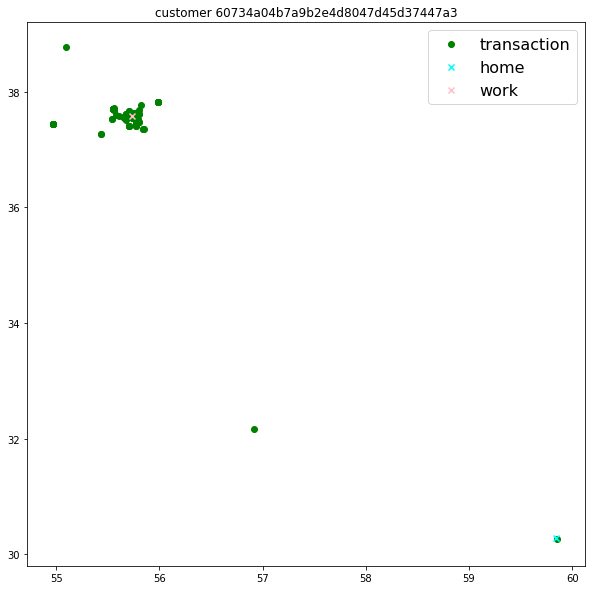

In [239]:
def plot(df):
    uniq_cust = train.customer_id.unique()
    s = np.random.choice(uniq_cust, size=1)[0]
    
    temp = train[train.customer_id == s]
    home = train[train.customer_id == s][['home_add_lat', 'home_add_lon']].values[0]
    work = train[train.customer_id == s][['work_add_lat', 'work_add_lon']].values[0]

    temp2 = pd.concat([temp[['atm_address_lat', 'atm_address_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'}), \
                       temp[['pos_address_lat', 'pos_address_lon']].rename(columns={'pos_address_lat':'lat', 'pos_address_lon':'lon'})])
    
    temp2.dropna(inplace=True)
    
    plt.figure(figsize=(10,10))
    plt.scatter(temp2.lat, temp2.lon, c='green', label='transaction')
    plt.scatter(home[0], home[1], c='cyan', marker='x', label='home')
    plt.scatter(work[0], work[1], c='pink', marker='x', label = 'work')
    plt.legend(fontsize=16)
    plt.title('customer '+s)

plot(train)

Очевидно, что в основном работа и дом распологаются около места какой нибудь транзакции, Также видно, что часто всю картину можно  разбить на несколько кластеров с некоторыми выбросами. И часто места работы и дома находятся в этих кластерах.  

**Здесь встает первый важный вопрос, как мы поставим задачу?**  
**1)** Мы можем выбирать координаты некоторый транзакции в качестве ответа (возможно еще постпроцессинг)   
**2)** Мы можем кластеризовать транзакции, выбрать кластер, аггрегировать ответ по кластеру  

По причине удобства работы с меньшими данными и не очень большим количеством оперативной памяти, я выбрал второй вариант. И потенциал первого способа кажется больше, т.к мы имеем возможность выбрать точку вне кластера и оказаться правы.   

Таким образом, мы генерим признаки для кластера и подаем это на вход нашему алгоритму.   

**Здесь встает второй важный вопрос, что за задачу мы получили? Классификация или Регрессия?**  
Ответ оказывается не таким очевидным. Давайте попробуем разные варианты


# Кластеризация

Для начала нужно определиться с алгоритмом кластеризации. Из структуры данных и смысла задачи самыми подходящими  алгоритмами являются алгоритмы основанные на плотности (Пробовал также иерархическую кластеризацию, она показала себя гораздо хуже). Поэтому выбор остановился на алгоритме DBSCAN. Таким образом мы получили первые два гиперпараметра в нашей задаче, это параметры DBSCAN-а: радиус окрестности и количество точек в окрестности.  

Выбор этих гиперпараметров производился на глаз (т.е смотря на картинки ниже), и понимания что что в итоге мы должны попасть в окрестность радиуса 0.02

2


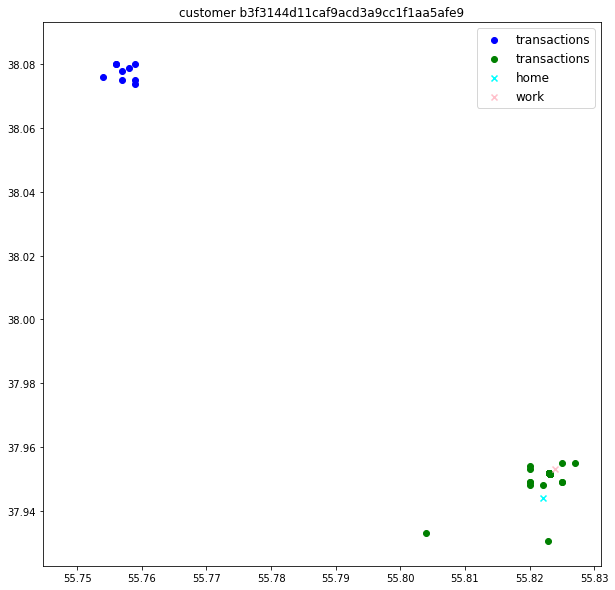

In [267]:
from sklearn.cluster import DBSCAN
def plot2(df, e, n):
    uniq_cust = train.customer_id.unique()
    s = np.random.choice(uniq_cust, size=1)[0]
    
    temp = train[train.customer_id == s]
    home = train[train.customer_id == s][['home_add_lat', 'home_add_lon']].values[0]
    work = train[train.customer_id == s][['work_add_lat', 'work_add_lon']].values[0]

    temp2 = pd.concat([temp[['atm_address_lat', 'atm_address_lon']].rename(columns={'atm_address_lat':'lat', 'atm_address_lon':'lon'}), \
                       temp[['pos_address_lat', 'pos_address_lon']].rename(columns={'pos_address_lat':'lat', 'pos_address_lon':'lon'})])
    
    temp2.dropna(inplace=True)
    
    clf = DBSCAN(eps = e, p=2, min_samples=n)
    temp2['out'] = clf.fit_predict(temp2[['lat', 'lon']].values)
    
    plt.figure(figsize=(10,10))
    colors = ['blue', 'green', 'red', 'violet', 'orange', 'brown', 'grey', 'yellow', 'magenta', 'cyan', 'pink', 'silver', 'gold', 'black', 'purple', 'olive','blue', 'green', 'red', 'violet', 'orange', 'brown', 'grey', 'yellow']
    
    print(temp2.out.max()+1)
    for c in range(temp2.out.max()+1):
        plt.scatter(temp2[temp2.out == c].lat, temp2[temp2.out == c].lon, c=colors[c], label = 'transactions')
    
#     plt.scatter(temp2[temp2.out == -1].lat, temp2[temp2.out == -1].lon, c='black')
    
    plt.scatter(home[0], home[1], c='cyan', marker='x', label='home')
    plt.scatter(work[0], work[1], c='pink', marker='x', label='work')
    plt.legend(fontsize=12)
    plt.title('customer '+s)

plot2(train, 0.05, 3)

# Baseline

В качестве baseline-а я выбрал следующее решение: кластеризуем все точки с параметрами радиус = 0.05, количество точек  = 3, затем выбираем самый большой кластер (в нем больше всего транзакций) выбираем среднюю/медианнную точку по кластеру и в качестве кординаты дома, и в качестве координаты работы.   

Здесь и далее буду приводить Результаты алгоритма по валидации на трейне.
Для предложенного baseline-а (валидация здесь не нужна) результат был **0.3095** (**0.39425**  для дома и **0.22475** для работы)

# Валидация

Я использовал кастомную трехфолдовую валидацию. Разбивал всех кастомеров на три группы. Обучал на двух группах, на третьей предсказывал. Так как трейн состоит всего из 10000 кастомеров то скор порой сильно зависил от того как были сгруппированы кастомеры по фолдам. Разбитие на фолды происходило каждый раз рандомно, т.к. при фиксированном random_state модель переобучалась под валидацию. Поэтому в итоге я брал усреднение по трем разным рандомным reandom_state-ам 

# Признаки

Для основной модели нам нужно было сгенерировать признаки для кластеров.  

Всего было попробовано около 400 признаков, из которых в финальную модель вошло около 250.
В большинстве случаем я не различал транзакции из терминалов и из pos-терминалов.  
В данной задаче я не использовал какого-то определенного метода отбора фичей. Отбор производился из собственных соображений и проверялся на валидации (и на паблик лидерборде)   

Все признаки перечислять не вижу смысла, поэтому перечислю только основные идеи:   

**1)**Информация о клиенте, сколько покупок, сколько уникальных мест покупок, суммы покупок, распределение покупок по выходным и не выходным дням

**2)**Количество транзакция в кластере, количество транзакций клиента, количества транзакций по дням недели, а также по выходным  и не выходным дням, дисперсия координат в кластере, количество кластеров этого клиента   

**3)**Среднее и медианное значение суммы транзакций, также я разделил все транзакции на три сегмента взависимости от суммы и проаггрегировал по каждой группе, также отдельно рассмотрел суммы из терминалов    

**4)**Частота покупок в данном кластере, дисперсия временных интервалов между соседними транзакциями, отдельно проагрегировал по временам года    

**5)**Я выделил некоторые важные mcc коды в группы (названия говорят сами за себя: продукты, рестораны и кафе, банки, аптеки, отели и гостиницы, парковка, обслуживание автомобиля, универмаги, спортивные товары, парикмахерские, салоны красоты, одежда, одежда для детей) которые мне казалось могут дать полезную информацию, и аггрегировал по этим группам. (Далее, это будет упоминаться как группы товаров)   

**6)**Т.к количество кластеров для каждого кастомера разное, то я посчитал что нужны фичи которые ранжировали бы кластер среди всех кластеров данного клиента. Например по количеству транзакция, количеству транзакций по категориям, по дисперсии координат   

**7)**Количество покупок по группам товаров в радиусе относительно центра кластера. Для разных радиусов и групп товаров   

**8)**Расстояние от центра кластера до ближайше транзакции определенной группы товаров  

**9)**Смотря на весь датасет, можем для каждого кластера вычислить количество магазинов (не транзакций, т.е данный кастомер возможно там ничего и не покупал, но покупал какой то другой кастомер) разных типов товаров в определенном радиусе   



# Задача и алгоритм

**1)** Первым делом я попробывал решать задачу регрессии, т.е предсказывать для каждого кластера растояние от центра кластера до дома/работы. Затем выбирать класстер с наименьшим расстоянием.    

**2)**Затем я рассмотрел задачу классификации (1 - усли центр попадает в радиус 0.02, и 0 - если не попадает). Затем брал кластер, который имеет наибольшую вероятность быть единицей.   

Среди алгоритмов рассмотрел: Линейную модель, Random Forest и xgboost. Ничего удивительного не произошло и xgboost оказался гораздо лучше своих конкурентов. Поэтому далее будем говорить только о нем. 

Вторая постановка задачи оказалась более успешной. Валидация дала **0.405** (на уже подтюниных параметрах), в то время как в задаче регрессии было получено **0.389625**, что тоже гораздо лучше baseline-а  

# Тюнинг модели

Сначала, при достаточно большом learning_rate = 0.1 и не очень большом количестве деревьев мы находим оптимальную глубину. Затем проверяем наш выбор увеличивая количество деревьев, тем самым также находя оптимальное каличество деревьев. Теперь мы можем более тонко настроить параметры, уменьшаем learning_rate и одновременно увеличиваем количество деревьев, находя оптимальные параметры. Теперь можно вносить некоторый рандом использую параметры subsample, colsample_bytree, colsample_bylevel (также возможно немного увеличивая число деревьев). Другие параметры я не использовал.   

Итоговая модель работала при learning_rate = 0.009, max_depth = 7, num_boost_round=1100, subsample = 0.7, colsample_bytree = 0.8, colsample_bylevel = 0.9   

Хочется отметить что большой прирост принесло уменьшение subsample, и это наверное не удивительно для не самого большого датасета с большим количеством выбросов (Имеется в виду что в данных есть достаточно много примеров когда работа или дом находились очень долеко от места транзакций, однако исключение таких примеров не давало прироста на паблике, т.к сам тест тоже содержит много таких же выбросов)  

# Гиперпараметры

После того как мы подобрали параметры xgboost-а, основными параметрами решения остались гиперпараметры кластеризации. Они действительно являются очень важными. Если мы начнем уменьшать радиус (также меняя количество точек в окружности), тем самым измельчая кластеризацию, то в пределе мы придем к задаче обсуждаемой ранее, когда мы вместо выбора кластера хотели выбирать точку (ведь при некоторых параметрах точка тоже является кластером). Эта задача казалась нам более перспективной по многим причинам. И вот теперь мы понимаем, что наши гиперпараметры отвечают за плавный переход между этими двумя задачами. Наша цель представляется сейчас как нахождения параметров для оптимального размера кластеров.     

Я провалидировал эти параметры по сетке, для значений радиуса [0.05, 0.03, 0.02, 0.016, 0.012, 0.01] и значений количества точек [1, 2, 3]. Графики представлены ниже:

Text(0,0.5,'validation score')

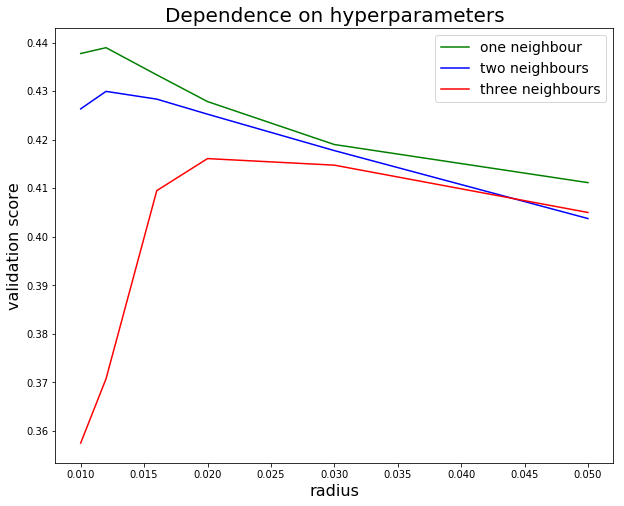

In [157]:
x = [0.05, 0.03, 0.02, 0.016, 0.012, 0.01]

num1 = [0.41115, 0.419, 0.42785, 0.43335, 0.43895, 0.43775]
num2 = [0.40375, 0.41775, 0.42525, 0.42835, 0.42995, 0.42635]
num3 = [0.405, 0.41475, 0.4161, 0.4095, 0.37075, 0.3575]

plt.figure(figsize = (10,8))
plt.plot(x, num1, c='green', label = 'one neighbour')
plt.plot(x, num2, c='blue', label = 'two neighbours')
plt.plot(x, num3, c='red', label = 'three neighbours')
plt.legend(loc='best', fontsize =14)
plt.title('Dependence on hyperparameters', fontsize =20)
plt.xlabel('radius', fontsize =16)
plt.ylabel('validation score', fontsize =16)

Таким образом, для финальной моделе были выбраны гиперпараметры r = 0.012, n = 1   

На public-лидерборде модель показала результат 0.440875 и 6-ое место (из 573 участников), на private-лидерборде модель показала 0.424796 и итоговое 7-ое место.  

# Интересные идеи

**1)** Вместо решения двух задач бинарной классификации (одна для выбора дома, другая для выбора работы), как это было сделано в задаче, пробовалась идея решения однойзадачи классификации на 4 класса ('дом и работа', 'дом, но не работа', 'работа, но не дом', 'ни дом, и ни работа'). Такая постановка задачи учитывала бы при предсказании работы, например, тот факт, находится ли в этом месте дом. Однако идея оказалась не успешной. Во многом по причине того что в трейне очень большое количество клиентов не имели работы, тем самым сильно сокращая обучающую выборку  

**2)** Также, для решения той же проблемы, был предложен такой подход. Обучали модель для дома на трейне, и предсказывали вероятность дома на тесте. Затем, на трейне для дома делали кросспредикт и обучали модель для работы на трейне учитывая вероятностями дома как признаки. А затем предсказывали работу на тесте учитывая предсказанную ранее на тесте рабрту. Данный подход поначалу приносил пользу, но когда модель была уже хорошая подход почти ничего не давал, так что в итоговой моделе он не использовался.   

**3)** Одной из особенностей тренировочного и тестового датасетов было то, что в них было небольшое количество транзакций, для которых был указан адрес, но латитьюда и лонгитьюда не были известны. Поэтому была возможность востановить эти неизвестные значения использую googlemaps. Эта ручная работа заняла несколько часов времени и дала примерно 45000 новых строк (к уже имеющимся 2400000). Этот подход принес небольшой плюс в определении работы, но точность определения дома упала. В итоге подход не был использован. 










